### Chapter 3: Linear Regression for a housing dataset

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [2]:
features = np.array([1,2,3,5,6,7])
labels = np.array([150,200,250,350,400,450])

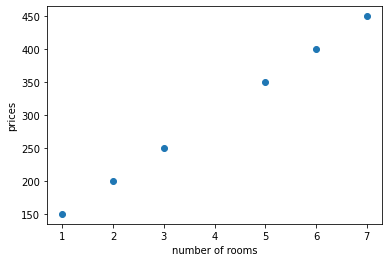

In [3]:
utils.plot_points(features, labels)

#### Coding the tricks: 1)Simple 2)Square 3)Absolute

Price per room: 50.27083896633202
Base price: 98.80442955506284


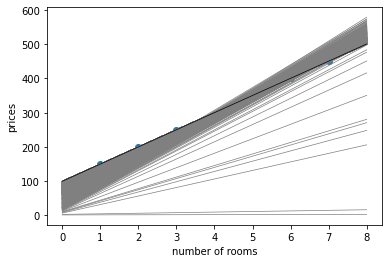

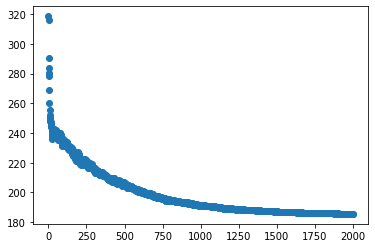

(50.27083896633202, 98.80442955506284)

In [11]:
linear_regression(features, labels, learning_rate=0.01, epochs=2000)

In [4]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -=small_random_1
        base_price -=small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [5]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room* num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price


In [6]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

### Running the linear regression algorithm

Price per room: 50.16499091512704
Base price: 99.02292169893838


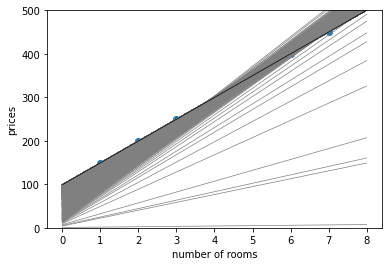

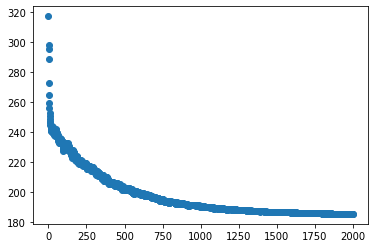

(50.16499091512704, 99.02292169893838)

In [19]:
import random

# We set the random seed in order to always get the same results
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for epoch in range(epochs):
        predictions=features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        #Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <=10:
        #if epoch <=50:
        # if epoch>50:
        if True:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, "black", starting=0, ending=8)
    utils.plot_points(features, labels)
    print("Price per room:", price_per_room)
    print("Base price:", base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate=0.01, epochs=2000)

### Root mean squared error function

In [8]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))


### Linear regression in Turi Create

In [9]:
import turicreate as tc

datadict = {
    'features': features,
    'labels': labels,
}
data=tc.SFrame(datadict)
data

features,labels
1,150
2,200
3,250
5,350
6,400
7,450


In [12]:
model = tc.linear_regression.create(data, target="labels")

Linear regression:

--------------------------------------------------------

Number of examples          : 6

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.070771     | 1.148285           | 0.826859                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [13]:
model.coefficients

name,index,value,stderr
(intercept),None,101.53104618095404,0.8700285834303092
features,None,49.61723845476149,0.19138077261925443


In [14]:
new_point = tc.SFrame({"features":[4]})
model.predict(new_point)

dtype: float
Rows: 1
[300.0]